## 1. EDA y Contexto

### 1.1 Contexto

Las empresas de telecomunicaciones enfrentan tasas significativas de pérdida de clientes. La predicción temprana de churn (es decir, de la pérdida del cliente) permite intervenir de manera oportuna. A través de modelos supervisados e interpretables, se puede identificar el perfil de clientes con mayor probabilidad de abandono y tomar decisiones informadas.

En este caso haremos uso de los modelos: `Random Forest`, `XGBoost`, `CatBoost` y `LightGBM`, esto con el fin de encontrar cual de estos ofrece mejores predicciones según las características disponibles.

### 1.2 Variables disponibles

Las variables predictoras que se utilizarán en este proyecto, para la predicción de la variable objetivo `churn`, son las siguientes:

- `customerID`: Identificador único del cliente

- `gender`: Género del cliente (Male/Female)

- `SeniorCitizen`: Indica si el cliente está pensionado o no (0/1)

- `Partner`: Indica si el cliente tiene un 'partner' o no (Yes/No)

- `Dependents`: Indica si el cliente tiene 'dependents' o no (Yes/No)

- `tenure`: Número de meses que el cliente ha estado en la empresa

- `PhoneService`: Indica si el cliente tiene un servicio telefónico o no (Yes/No)

- `MultipleLines`: Indica si el cliente tiene múltiples líneas de servicio telefónico o no (Yes, No, No phone service)

- `InternetService`: Proveedor de servicio de internet del cliente (DSL, Fiber optic, No)

- `OnlineSecurity`: Indica si el cliente tiene seguridad online o no (Yes, No, No internet service)

- `OnlineBackup`: Indica si el cliente tiene un respaldo online o no (Yes, No, No internet service)

- `DeviceProtection`: Indica si el cliente tiene protección en el dispositivo o no (Yes, No, No internet service)

- `TechSupport`: Indica si el cliente tiene soporte técnico o no (Yes, No, No internet service)

- `StreamingTV`: Indica si el cliente tiene servicio de Streaming TV (Yes, No, No internet service)

- `StreamingMovies`: Indica si el cliente tiene servicio de Streaming de películas (Yes, No, No internet service)

- `Contract`: Indica el término del contrato del cliente  (Month-to-month, One year, Two year)

- `PaperlessBilling`: Indica si el cliente tiene facturación electrónica o no

- `PaymentMethod`: Indica el método de pago del cliente

- `MonthlyCharges`: Monto que paga el cliente cada mes

- `TotalCharges`: Suma de todos los cobros pagados por el cliente





Una vez vistas las variables, veamos ahora la estructura del dataset disponible.

### 1.3 EDA

Antes que nada, necesitamos descargar los datos. Para esto podemos hacer uso de la librería `kagglehub` ya que los datos provienen de `Kaggle`.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

c:\Users\Hector\miniconda3\envs\ml_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 172k/172k [00:00<00:00, 3.21MB/s]

Extracting files...
Path to dataset files: C:\Users\Hector\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


Este `.csv` se almacena en la ruta que vemos en la salida anterior, y luego la pasamos a los archivos de este proyecto bajo el nombre de `telco_churn.csv`.

### 1.3.1 Primer vistazo a los datos

Ya con los datos disponibles en nuestro computador, procedemos a ver información relevante del dataset:

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
import pandas as pd

df=pd.read_csv('telco_churn.csv')

In [57]:
pd.set_option('display.max_columns', None) #Para mostrar todas las columnas del head()
pd.set_option('display.max_rows', None)

In [58]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Con `info()` vamos a rescatar información relevante del dataset como lo es su dimensión, el tipo de las variables explicativas, y la cantidad de registros no nulos:

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


El dataset: 

- Cuenta con un total de **7043 instancias** y **21 variables** (20 explicativas y 1 objetivo).

- No cuenta con valores faltantes, por lo que no hace falta realizar imputación de los mismos.

- Cuenta con 3 variables numéricas (2 de tipo entero y 1 de tipo flotante) y 17 variables categóricas sin contar la variable objetivo `Churn`.

In [60]:
df.duplicated().sum()

0

Además, no hay valores duplicados.

### 1.3.2 Cambios en el dataset

Si bien ya vimos que el dataset parece estar bastante limpio, hay algunas cosas que revisar aún.

Por ejemplo, el tipo de variable de `SeniorCitizen` es entero, pero esta es una variable categórica cuyas categorías son 0 y 1, por lo que hay que cambiarle el tipo a `object`:

In [61]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

Por otro lado, la variable `TotalCharges` aparece como tipo `object` cuando esta debería ser de tipo flotante, cambiemos eso:


In [62]:
df['TotalCharges']=df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

Pero como podemos ver en este error, en esta variable si existen valores faltantes, representados como: ''. Por lo que debemos hacerle una imputación a esta variable en específico.

In [63]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [64]:
df['TotalCharges'].isna().sum()

11

Luego de pasar la variable a flotante correctamente, los valores vacíos que vimos que existían se convirtieron en valores faltantes gracias al parámetro `errors='coerce'`. Luego, contamos estos valores faltantes y son un total de 11, es decir aproximadamente el 0.15% de la variable. Al ser tan pocos los datos faltantes, podemos hacer una imputación simple por la mediana:

In [65]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['TotalCharges'].isna().sum()

0

Por útlimo, antes de pasar con el análisis gráfico y descriptivo, eliminamos la variable `customerID`, ya que no aporta información relevante para la predicción.

In [66]:
df=df.drop(columns=['customerID'])

### 1.3.3 Visualización de la variable objetivo (`Churn`)

Veamos entonces como se encuentran distribuidos los registros para la variable objetivo `Churn`, con el fin de verificar si existe o no un desbalance en los datos:

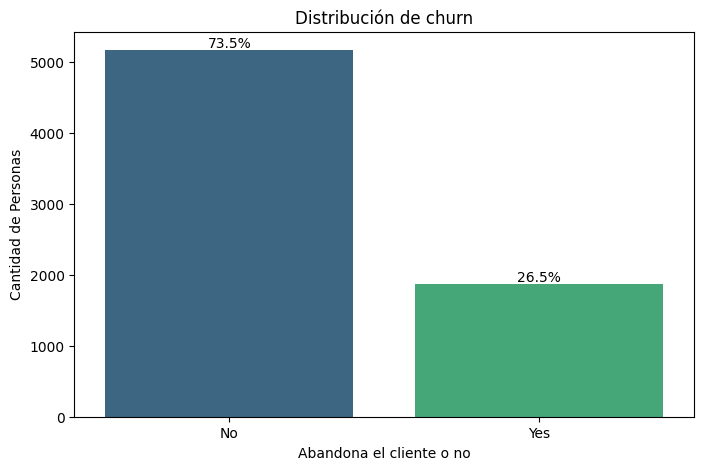

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribución de churn')
plt.xlabel('Abandona el cliente o no')
plt.ylabel('Cantidad de Personas')

total = len(df['Churn'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

print(df['Churn'].value_counts())

Gracias a este gráfico de barras podemos ver un claro desbalance de la variable objetivo, la cual cuenta con **5174 (73.5%)** registros de **no**, y **1869 (26.5%)** registros de que **si abandona la empresa**.

Es importante tener en cuenta este desbalance a la hora de implementar los modelos de árboles ya que es posible que un balanceo puede ofrecernos mejores resultados a la hora de predecir el abandono de los clientes.

### 1.3.4 Visualización univariada de las variables numéricas

Veamos primero con un `describe()` la distribución de las variables numéricas disponibles:

In [69]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


De esta información podemos rescatar lo siguiente:

- No parece haber ningún error de registro como valores negativos que no tendrían sentido en estas variables.

- Así mismo los valores de los cuartiles no indican valores irreales en el cobro mensual y total, ni tampoco en los meses de servicio que tengan los clientes.

- En el caso de los valores atípicos en el cobro mensual y total, no serán tratados debido a que estos son valores reales que pueden estar relacionados con la cantidad de meses que lleven vinculados a la empresa y los planes con los que cuenten.

Veamos esta información de manera gráfica:

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

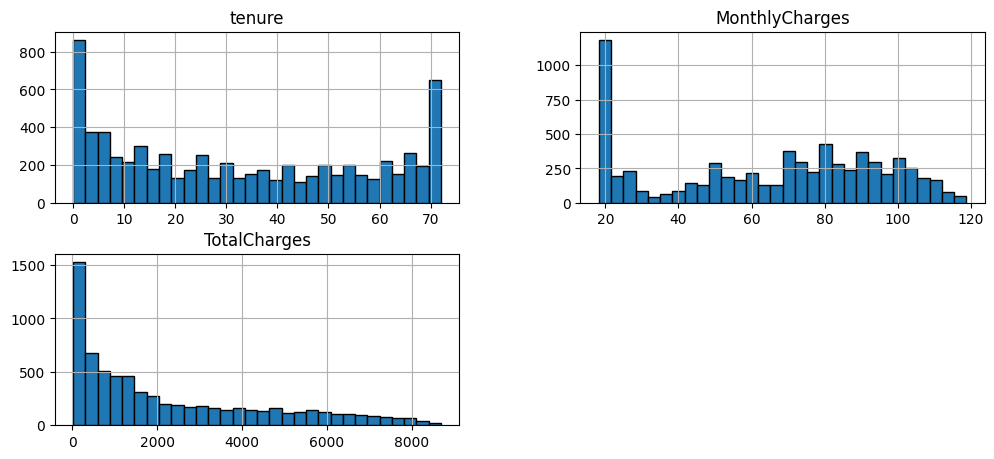

In [84]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(12, 8), layout=(3, 2), edgecolor='black')

Analizemos el comportamiento de las variables:

- En la variable `tenure` se ve que aunque una gran cantidad de personas solo está o estuvo vinculada a la empresa, también existe una buena cantidad que tienen o tuvieron un vínculo de 70 meses por lo menos, lo que indica una confianza del cliente con la misma.

- En la variable `MonthlyCharges` vemos que una gran cantidad de clientes se ubican en el extremo inferior del histograma, lo que indica que cuentan con planes básicos, mientras que se ve un aumento luego en los registros, lo que puede indicar que varios clientes cuentan con servicios múltiples.

- En la variable `TotalCharges` vemos otro comportamiento, un notorio sesgo a la derecha que puede indicar que la empresa tiene batantes clientes nuevos, o bien que abandonaron a empresa sin pagarles mucho dinero, y que a medida que aumentamos la cantidad pagada por los clientes, menor cantidad de clientes hay que hayan pagado esa cantidad.

Veamos ahora la distribución de las mismas pero con boxplots:

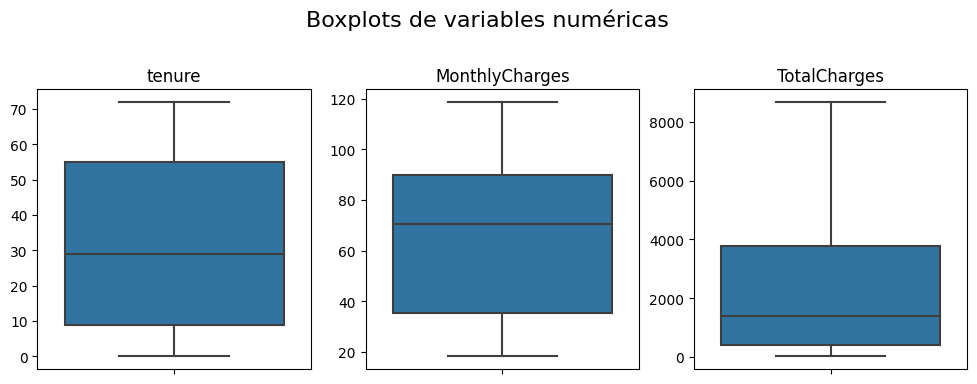

In [89]:
plt.figure(figsize=(12, 8))
plt.suptitle('Boxplots de variables numéricas', fontsize=16)
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')

Gracias a estos boxplots vemos que no hay valores que puedan ser considerados como atípicos, por lo que seguimos con el análisis.

### 1.3.5 Visualización bivariada de las variables numéricas

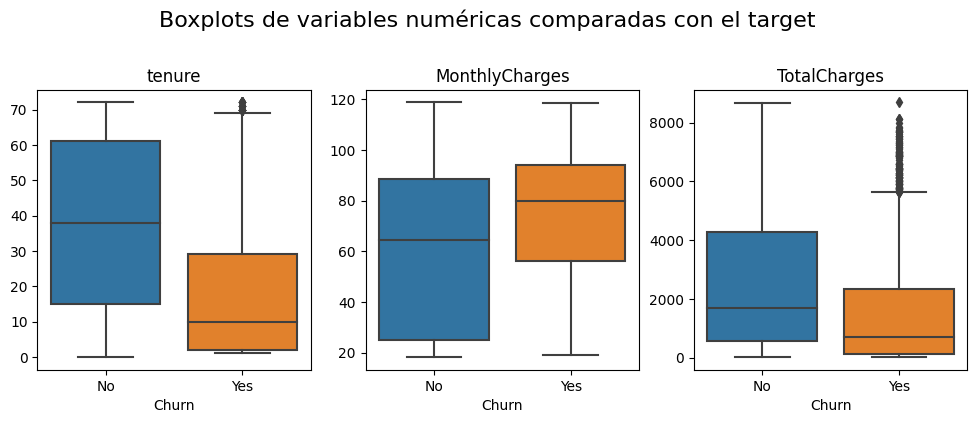

In [92]:
plt.figure(figsize=(12, 8))
plt.suptitle('Boxplots de variables numéricas comparadas con el target', fontsize=16)
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df['Churn'],y=df[col])
    plt.title(col)
    plt.ylabel('')

De esta comparación tenemos que:

- Por lo general, las personas que dan de baja sus servicios con la empresa tienden a estar menos tiempo en la misma que las que no se dieron de baja.

- También vemos cierta relación entre el monto mensual que pagan los usuarios y el hecho de que sigan o no en la empresa.

- Por último, la cantidad de dinero pagado en total no difiere tanto en ambos grupos.

Veamos ahora la distribución de las variables categóricas comparadas con el target.

### 1.3.6 Visualización bivariada de las variables categóricas

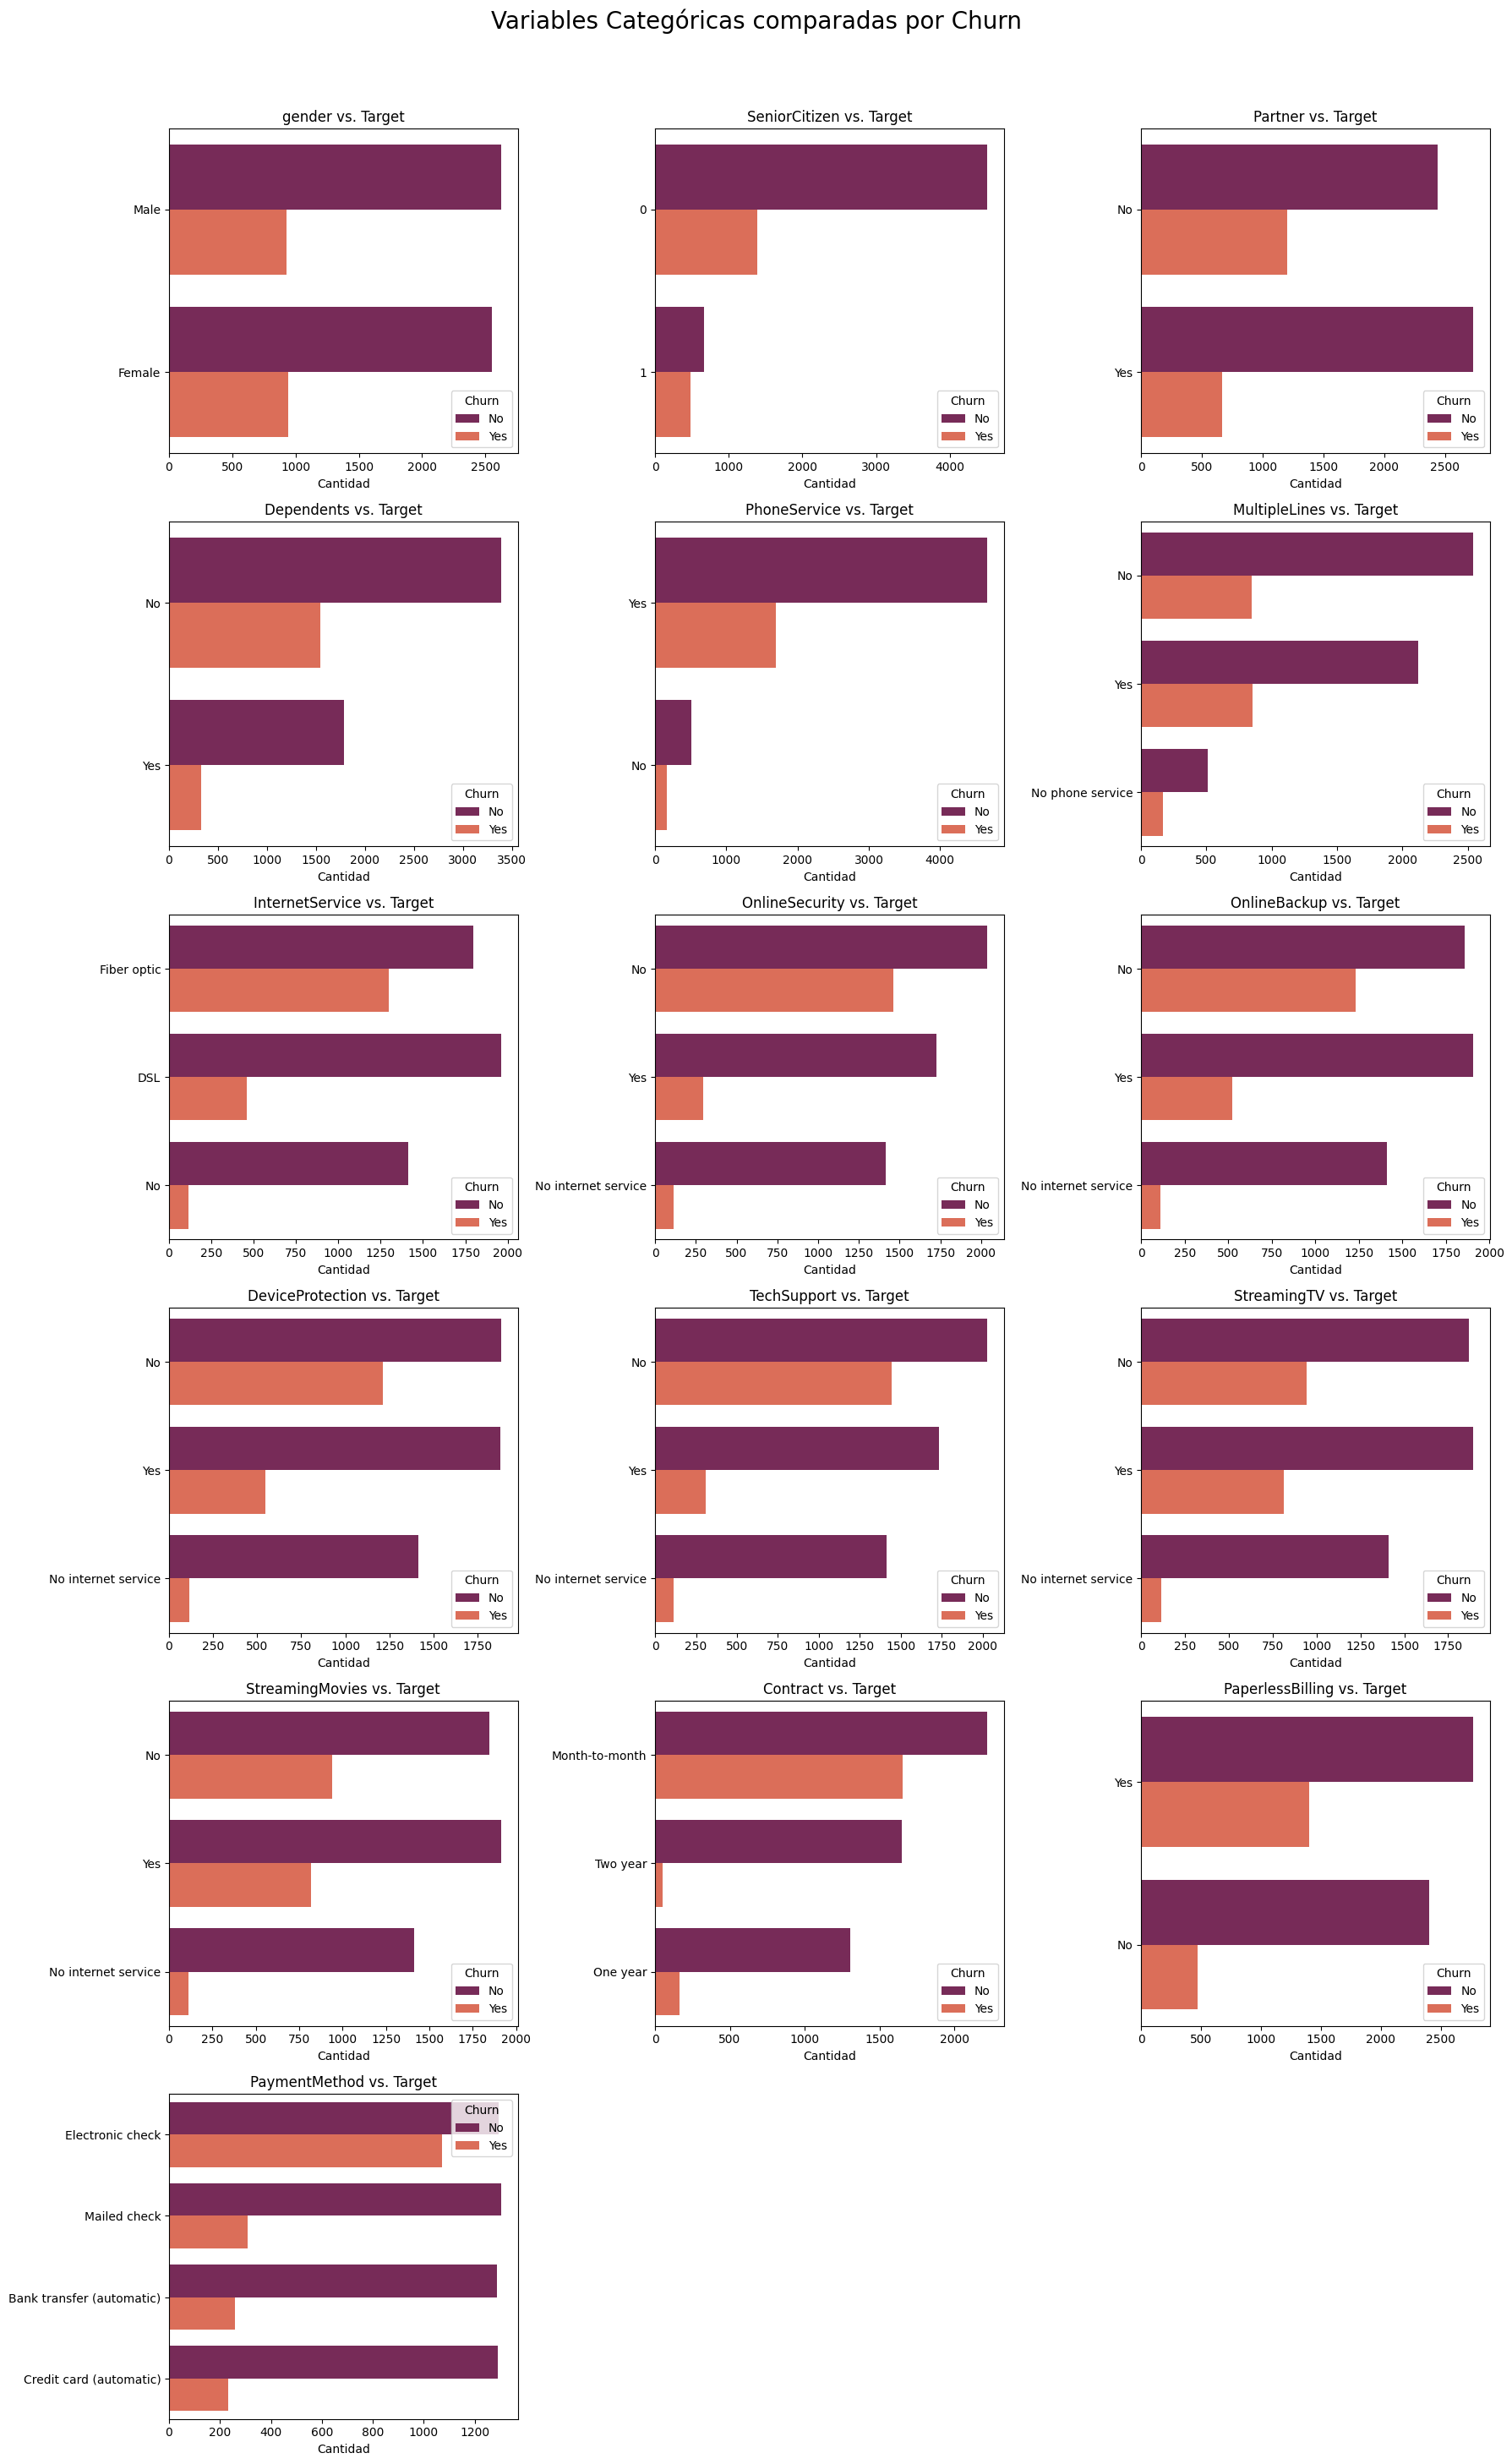

In [93]:
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Churn':
        cat_cols.append(col)
        

ncols = 3 

n_features = len(cat_cols)
nrows = (n_features + ncols - 1) // ncols

plt.figure(figsize=(18, nrows * 5))
plt.suptitle('Variables Categóricas comparadas por Churn', size=20, y=1.0)

for i, col in enumerate(cat_cols, 1):

    plt.subplot(nrows, ncols, i)
    sns.countplot(y=col, data=df, hue='Churn', order=df[col].value_counts().index, palette='rocket')
    plt.title(f'{col} vs. Target')
    plt.xlabel('Cantidad')
    plt.ylabel('')
    plt.legend(title='Churn')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

Algunas variables que pueden ser significativas a la hora de diferenciar entre las clases son:

- `InternetService` en la categoría "Fiber optic".

- `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` y `TechSupport` en la categoría "No".

- `Contract` en la categoría "Month-to-month"

- `PaymentMethod` en la categoría "Electronic check"

### 1.3.7 Correlación entre las variables numéricas

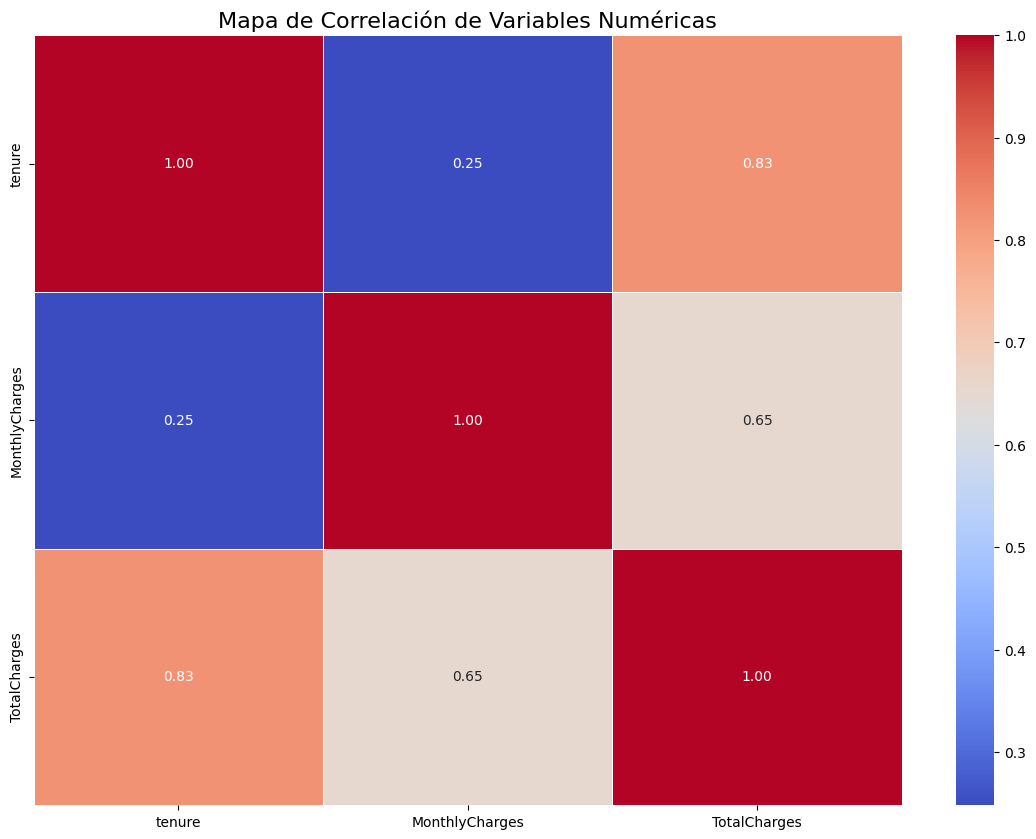

In [94]:
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlación de Variables Numéricas', size=16)
plt.show()

Vemos una fuerte correlación entre el número de meses que llevan los clientes en la empresa y el dinero que han pagado, lo cual es lógico, ya que entre más tiempo lleves en la empresa, mayor cantidad de dinero has pagado.

A su vez, hay una correlación un poco más moderada pero igualmente elevada entre el pago mensual y el total que ha pagado el cliente.

### 1.3.8 Conclusión del análisis exploratorio


Algunos detalles a tener en cuenta para el modelado son los siguientes:

- **Desbalance en la variable objetivo**: Importante a la hora de implementar los modelos, el desbalance de la variable objetivo (74/26 aproximadamente).

- **Posibles predictores más importantes**: Variables como `MonthlyCharges`, `TechSupport` y `Contract` se perfilan como algunas de las variables que mejor separen la variable objetivo.

Si bien no se realizaron mayores cambios al dataset importado, este es diferente al que resultó luego de este EDA, por lo que es necesario extraerlo con el fin de usarlo en el notebook del modelado:

In [95]:
df.to_pickle("data_limpia.pkl")     